# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Ryan Ferdinand Andyson
- **Email:** ryanfa1603@gmail.com
- **ID Dicoding:** ryanfa1603

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana kinerja penjualan serta pendapatan perusahaan dalam 2 tahun terakhir?
- Pertanyaan 2 : Kategori produk mana yang paling banyak dan paling sedikit terjual?
- Pertanyaan 3 : Bagaimana profil demografi pelanggan kita berdasarkan negara bagian?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

Mempersiapkan beberapa library yang akan digunakan untuk membantu dalam mengolah, menganalisis, dan memvisualisasikan data. Berikut penjelasan singkat dari pustaka-pustaka yang diimpor:
- Library pandas sangat berguna untuk mengelola dan memanipulasi data yang berbentuk tabel atau spreadsheet.
- Library numpy dgunakan untuk melakukan perhitungan matematis yang lebih kompleks, khususnya yang melibatkan array atau matriks.
- Library scipy memberikan banyak fungsi tambahan untuk perhitungan ilmiah, statistik, dan teknik lainnya.
- Library matplotlib.pyplot dipakai untuk membuat grafik dan visualisasi data. Dengan matplotlib, kita bisa membuat berbagai jenis grafik, seperti line chart, bar chart, hingga scatter plot, sehingga memudahkan kita dalam memvisualisasikan pola dari data.
- Library seaborn memberikan grafik yang lebih estetis dan intuitif, serta mendukung visualisasi statistik seperti korelasi, distribusi data, dan sebagainya.



## Data Wrangling

### Gathering Data

#### Memuat tabel customers_dataset

In [2]:
customers_df = pd.read_csv("customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


Membaca file dataset yang berformat CSV bernama "customers_dataset.csv" dan menyimpannya dalam bentuk DataFrame (customers_df) dan menggunakan perintah head untuk menampilkan lima baris pertama dari dataset tersebut.

#### Memuat tabel orders_dataset

In [3]:
orders_df = pd.read_csv("orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


Membaca file dataset yang berformat CSV bernama "orders_dataset.csv" dan menyimpannya dalam bentuk DataFrame (orders_df) dan menggunakan perintah head untuk menampilkan lima baris pertama dari dataset tersebut.

#### Memuat tabel products_dataset

In [4]:
products_df = pd.read_csv("products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


Membaca file dataset yang berformat CSV bernama "products_dataset.csv" dan menyimpannya dalam bentuk DataFrame (products_df) dan menggunakan perintah head untuk menampilkan lima baris pertama dari dataset tersebut.

#### Memuat tabel order_items_dataset

In [5]:
order_items_df = pd.read_csv("order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


Membaca file dataset yang berformat CSV bernama "order_items_dataset.csv" dan menyimpannya dalam bentuk DataFrame (order_items_df) dan menggunakan perintah head untuk menampilkan lima baris pertama dari dataset tersebut.

**Insight:**
- Pada proses Gathering Data ini dilakukan pembacaan beberapa file dataset dan setiap file dataset disimpan dalam bentuk DataFrame dengan menggunakan library pandas dan kemudian menampilkan 5 baris teratas dari setiap file dataset tersebut.


### Assessing Data

### Menilai Data customers_df

#### Memeriksa tipe data dari customers_df

In [6]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


Function info() pada dataFrame customers_df untuk menampilkan informasi struktur dataframe customers_df meliputi jumlah baris, nama kolom, dan tipe data.

#### Memeriksa missing value dari customers_df

In [7]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Kode di atas berfungsi untuk menampilkan informasi terkait jumlah missing values yang terdapat dalam setiap kolom dan hasil di atas menunjukkan bahwa tidak terdapat missing values pada DataFrame customers_df.

#### Memeriksa duplikasi data dari customers_df

In [8]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


Kode di atas berfungsi untuk memeriksa jumlah duplikasi data yang terdapat dalam DataFrame customers_df dan hasil di atas menunjukkan bahwa tidak terdapat data yang terduplikat pada DataFrame customers_df.

#### Memeriksa parameter statistik kolom numerik dari customers_df

In [9]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


Kode di atas berfungsi untuk menampilkan ringkasan parameter statistik (mean, median, dll.) dari kolom numerik pada DataFrame customers_df.

### Menilai Data orders_df

#### Memeriksa tipe data dari orders_df

In [10]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Function info() pada dataFrame orders_df untuk menampilkan informasi struktur dataframe orders.df meliputi jumlah baris, nama kolom, dan tipe data. Pada hasil di atas, terdapat kesalahan tipe data untuk kolom order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date. Kelima kolom tersebut seharusnya direpresentasikan sebagai tipe data datetime, bukan object.

#### Memeriksa missing value dari orders_df

In [11]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Kode di atas berfungsi untuk menampilkan informasi terkait jumlah missing values yang terdapat dalam setiap kolom dan hasil di atas menunjukkan bahwa terdapat beberapa missing values pada DataFrame orders_df untuk kolom order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date.

#### Memeriksa duplikasi data dari orders_df

In [12]:
print("Jumlah duplikasi: ",orders_df.duplicated().sum())
orders_df.describe()

Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


Kode di atas berfungsi untuk memeriksa jumlah duplikasi data yang terdapat dalam DataFrame customers_df dan hasil di atas menunjukkan bahwa tidak terdapat data yang terduplikat pada DataFrame orders_df dan describe berfungsi untuk menampilkan ringkasan parameter statistik (mean, median, dll.) dari kolom numerik pada DataFrame orders_df.

### Menilai Data products_df

#### Memeriksa tipe data dari products_df

In [13]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


Function info() pada dataFrame products_df untuk menampilkan informasi struktur dataframe orders.df meliputi jumlah baris, nama kolom, dan tipe data.

#### Memeriksa missing value dari products_df

In [14]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Kode di atas berfungsi untuk menampilkan informasi terkait jumlah missing values yang terdapat dalam setiap kolom dan hasil di atas menunjukkan bahwa terdapat missing values pada DataFrame products_df di beberapa kolom dari DataFrame products_df.

#### Memeriksa duplikasi data dari products_df

In [15]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())
products_df.describe()

Jumlah duplikasi:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


Kode di atas berfungsi untuk memeriksa jumlah duplikasi data yang terdapat dalam DataFrame products_df dan hasil di atas menunjukkan bahwa tidak terdapat data yang terduplikat pada DataFrame products_df dan describe berfungsi untuk menampilkan ringkasan parameter statistik (mean, median, dll.) dari kolom numerik pada DataFrame products_df.

### Menilai Data order_items_df

#### Memeriksa tipe data dari order_items_df

In [16]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Function info() pada dataFrame order_items_df untuk menampilkan informasi struktur dataframe orders.df meliputi jumlah baris, nama kolom, dan tipe data.

#### Memeriksa missing value dari order_items_df

In [17]:
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Kode di atas berfungsi untuk menampilkan informasi terkait jumlah missing values yang terdapat dalam setiap kolom dan hasil di atas menunjukkan bahwa tidak terdapat missing values pada DataFrame order_items_df.

#### Memeriksa duplikasi data dari order_items_df

In [18]:
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())
order_items_df.describe()

Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


Kode di atas berfungsi untuk memeriksa jumlah duplikasi data yang terdapat dalam DataFrame order_items_df dan hasil di atas menunjukkan bahwa tidak terdapat data yang terduplikat pada DataFrame order_items_df dan describe berfungsi untuk menampilkan ringkasan parameter statistik (mean, median, dll.) dari kolom numerik pada DataFrame order_items_df.

**Insight:**
- Pada proses Assessing data ini kita akan menilai kualitas dari seluruh data yang akan digunakan dan proses ini bertujuan untuk melihat berbagai permasalahan yang ada dalam data tersebut. 
- Setelah dilakukan proses assessing data, pada customers_df tidak terdapat missing value, data yang duplikat, atau kesalahan tipe data.
- Setelah dilakukan proses assessing data, pada orders_df terdapat missing value dan kesalahan tipe data pada beberapa kolom. 
- Setelah dilakukan proses assessing data, pada products_df terdapat missing value. 
- Setelah dilakukan proses assessing data, pada customers_df tidak terdapat missing value, data yang duplikat, atau kesalahan tipe data.

### Cleaning Data

### Membersihkan Data orders_df

#### Memperbaiki tipe data object ke datetime

In [19]:
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

Kode di atas berrtujuan untuk mengonversi beberapa kolom object dalam orders_df yang berisi informasi tanggal dan waktu menjadi format datetime dan daftar kolom yang ingin dikonversi disimpan dalam variabel datetime_columns. Kemudian, melalui perulangan, setiap kolom dalam daftar tersebut diubah ke format datetime menggunakan fungsi pd.to_datetime().

In [20]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


Function info() pada dataFrame products_df untuk menampilkan kembali informasi struktur dataframe orders.df meliputi jumlah baris, nama kolom, dan tipe data dan dapat dilihat daftar kolom kolom object dalam orders_df yang berisi informasi tanggal dan waktu telah diubah menjadi tipe data datetime64.

#### Menghapus missing value di dalam DataFrame.

In [21]:
orders_df = orders_df.dropna()
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


Kode di atas berfungsi untuk membersihkan data dari nilai yang kosong (NaN) dalam dataframe orders_df. Baris pertama menghapus semua baris yang memiliki nilai kosong dan kemudian menampilkan lima baris pertama dari dataframe yang sudah dibersihkan untuk memeriksa hasilnya.

In [22]:
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

Kode di atas berfungsi untuk menampilkan kembali informasi terkait jumlah missing values yang terdapat dalam setiap kolom dan dapat dilihat DataFrame tidak lagi memiliki missing value.

In [23]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


Function info() pada dataFrame products_df untuk menampilkan kembali informasi struktur dataframe orders.df meliputi jumlah baris, nama kolom, dan tipe data dan dapat dilihat daftar kolom object dalam orders_df yang berisi informasi tanggal dan waktu telah diubah menjadi tipe data datetime64 serta tidak lagi memiliki missing value.

###  Membersihkan Data products_df

#### Menghapus missing value di dalam DataFrame.

In [24]:
products_df = products_df.dropna()
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


Kode di atas berfungsi untuk membersihkan data dari nilai yang kosong (NaN) dalam dataframe orders_df. Baris pertama menghapus semua baris yang memiliki nilai kosong dan kemudian menampilkan lima baris pertama dari dataframe yang sudah dibersihkan untuk memeriksa hasilnya.

In [25]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32340 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32340 non-null  object 
 1   product_category_name       32340 non-null  object 
 2   product_name_lenght         32340 non-null  float64
 3   product_description_lenght  32340 non-null  float64
 4   product_photos_qty          32340 non-null  float64
 5   product_weight_g            32340 non-null  float64
 6   product_length_cm           32340 non-null  float64
 7   product_height_cm           32340 non-null  float64
 8   product_width_cm            32340 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


Function info() pada dataFrame products_df untuk menampilkan kembali informasi struktur dataframe orders.df meliputi jumlah baris, nama kolom, dan tipe data dan dapat dilihat dalam orders_df tidak lagi memiliki missing value.

**Insight:**
- Pada proses ini telah dilakukan pembersihan berbagai masalah yang telah teridentifikasi dalam proses assessing data pada DataFrame orders_df dan products_df
- Setelah dilakukan proses cleaning data, pada orders_df telah dilakukan perubahan tipe data dari kolom object yang berisi berisi informasi tanggal dan waktu menjadi date time serta menghapus beberapa baris yang memiliki miising value.
- Setelah dilakukan proses cleaning data, pada products_df telah menghapus beberapa baris yang memiliki miising value.

## Exploratory Data Analysis (EDA)

### Data Exploration

#### Eksplorasi Data customers_df

In [26]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


Fungsi describe dengan parameter include all berfungsi untuk menampilkan ringkasan parameter statistik (mean, median, dll.) dari semua kolom pada DataFrame order_items_df.

#### Melihat distribusi jumlah pelanggan berdasarkan kota (city)

In [27]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

Kode di atas menampilkan distribusi jumlah pelanggan berdasarkan kota dengan menggunakan method groupby() dan nilai-nilainya akan diurutkan secara menurun dengan method sort_values(). Berdasarkan hasil di atas, persebaran pelanggan tidak merata untuk di setiap kota dengan pelanggan kita paling banyak berada di kota sao paulo, rio de janeiro, dan belo horizonte.

#### Melihat distribusi jumlah pelanggan berdasarkan negara bagian (state)

In [28]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

Kode di atas menampilkan distribusi jumlah pelanggan berdasarkan state dengan menggunakan method groupby() dan nilai-nilainya akan diurutkan secara menurun dengan method sort_values(). Berdasarkan hasil di atas, persebaran pelanggan tidak merata untuk di setiap state dengan pelanggan kita paling banyak berada di state SP, RJ, dan MG.

#### Eksplorasi Data orders_df

In [29]:
orders_df.describe(include="all")

C:\Users\User\AppData\Local\Temp\ipykernel_2772\2273736046.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe(include="all")
C:\Users\User\AppData\Local\Temp\ipykernel_2772\2273736046.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe(include="all")
C:\Users\User\AppData\Local\Temp\ipykernel_2772\2273736046.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavi

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,96461,96461,96461,96461,96461,96461,96461,96461
unique,96461,96461,2,95939,88272,80100,95649,445
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-14 20:02:44,2017-12-20 00:00:00
freq,1,1,96455,3,9,47,3,507
first,NaN,NaN,NaN,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00
last,NaN,NaN,NaN,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00


Fungsi describe dengan parameter include all berfungsi untuk menampilkan ringkasan parameter statistik (mean, median, dll.) dari semua kolom pada DataFrame orders_df.

#### Memeriksa waktu pengiriman tiap pesanan

In [30]:
delivery_time = orders_df["order_estimated_delivery_date"] - orders_df["order_purchase_timestamp"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_df["delivery_time"] = round(delivery_time/86400)

In [31]:
orders_df.describe(include="all")

C:\Users\User\AppData\Local\Temp\ipykernel_2772\2273736046.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe(include="all")
C:\Users\User\AppData\Local\Temp\ipykernel_2772\2273736046.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe(include="all")
C:\Users\User\AppData\Local\Temp\ipykernel_2772\2273736046.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavi

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
count,96461,96461,96461,96461,96461,96461,96461,96461,96461.000000
unique,96461,96461,2,95939,88272,80100,95649,445,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-14 20:02:44,2017-12-20 00:00:00,NaN
freq,1,1,96455,3,9,47,3,507,NaN
first,NaN,NaN,NaN,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00,NaN
last,NaN,NaN,NaN,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.643825
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.770915
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000


Pada kode di atas, waktu estimasi pengiriman dikurangi dengan waktu pembelian untuk mendapatkan selisih waktu. Lalu, hasil selisih tersebut diubah ke satuan detik menggunakan fungsi total_seconds(). Terakhir, selisih waktu ini dikonversi menjadi hari dengan membagi 86.400 detik (jumlah detik dalam sehari) dan dibulatkan, sebelum disimpan ke kolom baru bernama "delivery_time" di dataframe orders_df. Kemudian fungsi describe dengan parameter include all berfungsi untuk menampilkan ringkasan parameter statistik (mean, median, dll.) dari semua kolom pada DataFrame orders_df dan berdasarkan hasil tersebut, dapat diketahui bahwa rata-rata waktu pengiriman sebesar 23 hari dengan nilai maksimum sebesar 155 hari dan nilai minimum sebesar 2 hari. 

#### Eksplorasi Data orders_df dan customers_df

#### Merge DataFrame orders_df dan customers_df

In [32]:
orders_customers_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders_customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,16.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,19.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,27.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,26.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,12.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


Kode idi atas menggabungkan dua dataframe, yaitu orders_df dan customers_df berdasarkan kolom customer_id. Proses penggabungan menggunakan metode left join dan hasil penggabungan disimpan dalam dataframe baru bernama orders_customers_df.

#### Menghitung jumlah order berdasarkan kota

In [33]:
orders_customers_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,customer_city,order_id
0,sao paulo,15044
1,rio de janeiro,6603
2,belo horizonte,2697
3,brasilia,2071
4,curitiba,1489
5,campinas,1406
6,porto alegre,1341
7,salvador,1188
8,guarulhos,1143
9,sao bernardo do campo,911


Kode ini mengelompokkan data orders_customers_df berdasarkan kolom city dan menghitung jumlah pesanan (order_id.nunique()) di setiap kota. Berdasarkan hasil tersebut, diketahui bahwa kota sao paulo dan rio de janeiro merupakan dua kota yang memiliki jumlah order terbanyak.

#### Menghitung jumlah order berdasarkan negara bagian

In [34]:
orders_customers_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False)

customer_state
SP    40489
RJ    12351
MG    11352
RS     5342
PR     4923
SC     3547
BA     3256
DF     2080
ES     1995
GO     1957
PE     1593
CE     1278
PA      946
MT      886
MA      716
MS      701
PB      517
PI      476
RN      474
AL      397
SE      335
TO      274
RO      243
AM      145
AC       80
AP       67
RR       41
Name: order_id, dtype: int64

Kode ini mengelompokkan data orders_customers_df berdasarkan kolom city dan menghitung jumlah pesanan (order_id.nunique()) di setiap kota. Berdasarkan hasil tersebut, diketahui bahwa kota sao paulo dan rio de janeiro merupakan dua kota yang memiliki jumlah order terbanyak. Berdasarkan hasil tersebut, diketahui bahwa negara bagian dengan kode SP, RJ, dan MG merupakan dua kota yang memiliki jumlah order terbanyak.

#### Eksplorasi Data products_df dan order_items_df

In [35]:
products_df.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32340,32340,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000
unique,32340,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476592,771.492393,2.188961,2276.956586,30.854545,16.958813,23.208596
std,NaN,NaN,10.245699,635.124831,1.736787,4279.291845,16.955965,13.636115,12.078762
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


Fungsi describe dengan parameter include all berfungsi untuk menampilkan ringkasan parameter statistik (mean, median, dll.) dari semua kolom pada DataFrame products_df.

In [36]:
order_items_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


Fungsi describe dengan parameter include all berfungsi untuk menampilkan ringkasan parameter statistik (mean, median, dll.) dari semua kolom pada DataFrame order_items_df. Berdasarkan hasil tersebut, dapat dilihat bahwa harga barang yang dijual berkisar antara 1 hingga 6735 dolar.

#### Merge DataFrame order_items_df dan products_df

In [37]:
order_item_product_df = pd.merge(
    left=order_items_df,
    right=products_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
order_item_product_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


Kode di atas menggabungkan dua dataframe, yaitu order_items_df dan products_df berdasarkan kolom product_id. Proses penggabungan menggunakan metode left join dan hasil penggabungan disimpan dalam dataframe baru bernama order_item_product_df.

#### Memeriksa jumlah dan harga transaksi yang dilakukan pelanggan

In [38]:
order_item_product_df.sort_values(by="price", ascending=False)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
3556,0812eb902a67711a1cb742b3cdaa65ae,1,489ae2aa008f021502940f251d4cce7f,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.00,194.31,utilidades_domesticas,31.0,875.0,2.0,30000.0,60.0,61.0,33.0
112233,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21,pcs,50.0,1935.0,4.0,5660.0,54.0,18.0,47.0
107841,f5136e38d1a14a4dbd87dff67da82701,1,1bdf5e6731585cf01aa8169c7028d6ad,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.00,227.66,artes,28.0,3954.0,2.0,7400.0,47.0,25.0,25.0
74336,a96610ab360d42a2e5335a3998b4718a,1,a6492cc69376c469ab6f61d8f44de961,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.00,151.34,eletroportateis,41.0,1780.0,2.0,22600.0,55.0,40.0,40.0
11249,199af31afc78c699f0dbf71fb178d4d4,1,c3ed642d592594bb648ff4a04cee2747,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.00,74.34,eletroportateis,59.0,2217.0,2.0,30000.0,50.0,49.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57304,8272b63d03f5f79c56e9e4120aec44ef,8,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,beleza_saude,45.0,231.0,3.0,800.0,21.0,4.0,15.0
57300,8272b63d03f5f79c56e9e4120aec44ef,4,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,beleza_saude,45.0,231.0,3.0,800.0,21.0,4.0,15.0
48625,6e864b3f0ec71031117ad4cf46b7f2a1,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-02 20:30:34,0.85,18.23,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0
27652,3ee6513ae7ea23bdfab5b9ab60bffcb5,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-04 03:55:26,0.85,18.23,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0


Kode ini mengurutkan data dari harga tertinggi ke terendah dalam dataframe order_item_product_df berdasarkan kolom price dan menggunakan parameter ascending=False.

#### Memeriksa informasi terkait kategori produk

In [39]:
order_item_product_df.groupby(by="product_category_name",).agg({
    "product_id": "nunique",
    "product_photos_qty": "sum",
    "price":  ["min", "max"]
})

product_id product_photos_qty  price         
                             nunique                sum    min      max
product_category_name                                                  
agro_industria_e_comercio         74              498.0  12.99  2990.00
alimentos                         82              850.0   9.99   274.99
alimentos_bebidas                104              546.0   6.50   699.90
artes                             55              395.0   3.50  6499.00
artes_e_artesanato                19               89.0   9.80   289.49
...                              ...                ...    ...      ...
sinalizacao_e_seguranca           93              461.0   4.50   740.00
tablets_impressao_imagem           9              155.0  14.90   889.99
telefonia                       1134            13193.0   5.00  2428.00
telefonia_fixa                   116              767.0   6.00  1790.00
utilidades_domesticas           2335            16183.0   3.06  6735.00

[73 rows x 4 columns]

Kode ini mengelompokkan data di order_item_product_df berdasarkan kolom product_category_name dan melakukan beberapa agregasi. Untuk setiap kategori produk, kode ini menghitung jumlah produk unik (nunique pada product_id), menjumlahkan total jumlah foto produk (sum pada product_photos_qty), serta menemukan harga minimum dan maksimum (min dan max pada price). Pivot table di atas dapat memberikan kita gambaran terkait kategori produk yang dijual.

#### Eksplorasi Data all_df

#### Merge DataFrame order_item_product_df dan orders_customers_df

In [40]:
all_df = pd.merge(
    left=order_item_product_df,
    right=orders_customers_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,...,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,16.0,871766c5855e863f6eccc05f988b23cb,28013.0,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,...,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,19.0,eb28e67c4c0b83846050ddfb8a35d051,15775.0,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,...,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,21.0,3818d81c6709e39d06b2738a8d3a2474,35661.0,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,...,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,12.0,af861d436cfc08b2c2ddefd0ba074622,12952.0,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,...,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,40.0,64b576fb70d441e8f1b2d7d446e483c5,13226.0,varzea paulista,SP


Kode di atas menggabungkan dua dataframe yang telah merge sebelumnya, yaitu order_item_product_df dan orders_customers_df berdasarkan kolom order_id. Proses penggabungan menggunakan metode left join dan hasil penggabungan disimpan dalam dataframe baru bernama all_df.

#### Memeriksa preferensi pembelian berdasarkan negara bagian pelanggan dan kategori produk

In [41]:
all_df.groupby(by=["customer_state", "product_category_name"]).agg({
    "product_photos_qty": "sum",
    "price": "sum"
})

product_photos_qty    price
customer_state product_category_name                                   
AC             artigos_de_natal                            1.0    69.90
               automotivo                                  9.0   540.98
               bebes                                       5.0   697.84
               beleza_saude                                9.0  1386.58
               brinquedos                                 13.0   234.79
...                                                        ...      ...
TO             portateis_casa_forno_e_cafe                 7.0  1999.00
               relogios_presentes                         80.0  4920.89
               telefonia                                  57.0  1268.12
               telefonia_fixa                              6.0  1390.99
               utilidades_domesticas                      31.0   926.17

[1362 rows x 2 columns]

Kode ini mengelompokkan data dalam all_df berdasarkan dua kolom: customer_state dan product_category_name. Untuk setiap kombinasi negara bagian pelanggan dan kategori produk, kode ini menjumlahkan total jumlah produk dan total harga. Pivot table di atas memberikan kita gambaran terkait tipe produk yang disukai pengguna berdasarkan lokasi negara bagiannya.

#### Memeriksa preferensi pembelian berdasarkan kota pelanggan dan kategori produk

In [42]:
all_df.groupby(by=["customer_city", "product_category_name"]).agg({
    "product_photos_qty": "sum",
    "price": "sum"
})

product_photos_qty   price
customer_city       product_category_name                             
abadia dos dourados cool_stuff                             1.0  199.00
                    esporte_lazer                          1.0  120.00
                    livros_interesse_geral                 2.0   39.90
abadiania           eletroportateis                        6.0  949.99
abaete              bebes                                  1.0   65.00
...                                                        ...     ...
ze doca             bebes                                  4.0   74.80
                    esporte_lazer                          6.0  149.90
                    ferramentas_jardim                     1.0   39.90
                    instrumentos_musicais                  5.0  359.00
zortea              informatica_acessorios                 3.0   69.90

[24911 rows x 2 columns]

Kode ini mengelompokkan data dalam all_df berdasarkan dua kolom: customer_city dan product_category_name. Untuk setiap kombinasi kota pelanggan dan kategori produk, kode ini menjumlahkan total jumlah produk dan total harga. Pivot table di atas memberikan kita gambaran terkait tipe produk yang disukai pengguna berdasarkan kota.

**Insight:**
- Proses EDA ini bertujuan untuk Proses ini memiliki tujuan antara lain membuat pertanyaan analisis atau bisnis yang ingin dicari jawabannya dan melakukan eksplorasi terhadap setiap data untuk mencari insight menarik guna menjawab pertanyaan bisnis tersebut.
- Pada proses ini, dilakukan eksplorasi data customers_df dan melihat distribusi jumlah pelanggan berdasarkan kota (city) dan berdasarkan negara bagian (state).
- Kemudian, pada proses ini juga dilakukan eksplorasi data orders_df dan memeriksa waktu pengiriman tiap pesanan.
- Selanjutnya, melakukan penggabungan dataframe orders_df dan customers_df dan menghitung jumlah order berdasarkan negara bagian dan kota, diketahui bahwa kota sao paulo dan rio de janeiro merupakan dua kota yang memiliki jumlah order terbanyak serta negara bagian SP, RJ, dan MG merupakan negara bagian yang memiliki jumlah order terbanyak.
- Lalu, melakukan penggabungan dataframe products_df dan order_items_df dan memeriksa jumlah dan harga trasaksi yang dilakukan pelangan dan melihat informasi terkait kategori produk.
- Terakhir, melakukan penggabungan dataframe order_item_product_df dan orders_customers_df serta memeriksa preferensi pembelian berdasarkan negara bagian dan kota pelanggan dan kategori produk

## Visualization & Explanatory Analysis

### Pertanyaan 1:  Bagaimana kinerja penjualan serta pendapatan perusahaan dalam beberapa bulan terakhir?

#### Mengubah frekuensi data untuk mendapatkan informasi mengenai jumlah pesanan dan total pendapatan yang diperoleh setiap bulannya.

In [43]:
monthly_orders_df = all_df.resample(rule='M', on='order_purchase_timestamp').agg({
    "order_id": "nunique",
    "price": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "price": "revenue"
}, inplace=True)
monthly_orders_df.head()

,order_purchase_timestamp,order_count,revenue
0,2016-09,1,134.97
1,2016-10,270,40941.30
2,2016-11,0,0.00
3,2016-12,1,10.90
4,2017-01,748,111712.47


Kodingan ini digunakan untuk mengolah data pesanan dengan mengelompokkan dan menjumlahkan total pesanan dan pendapatan bulanan berdasarkan timestamp pembelian. Setelah itu, format tanggal diubah menjadi format tahun-bulan, dan kolom-kolom hasilnya dinamai ulang agar lebih jelas, lalu ditampilkan lima baris pertama dari data tersebut.

#### Line chart jumlah order per bulan

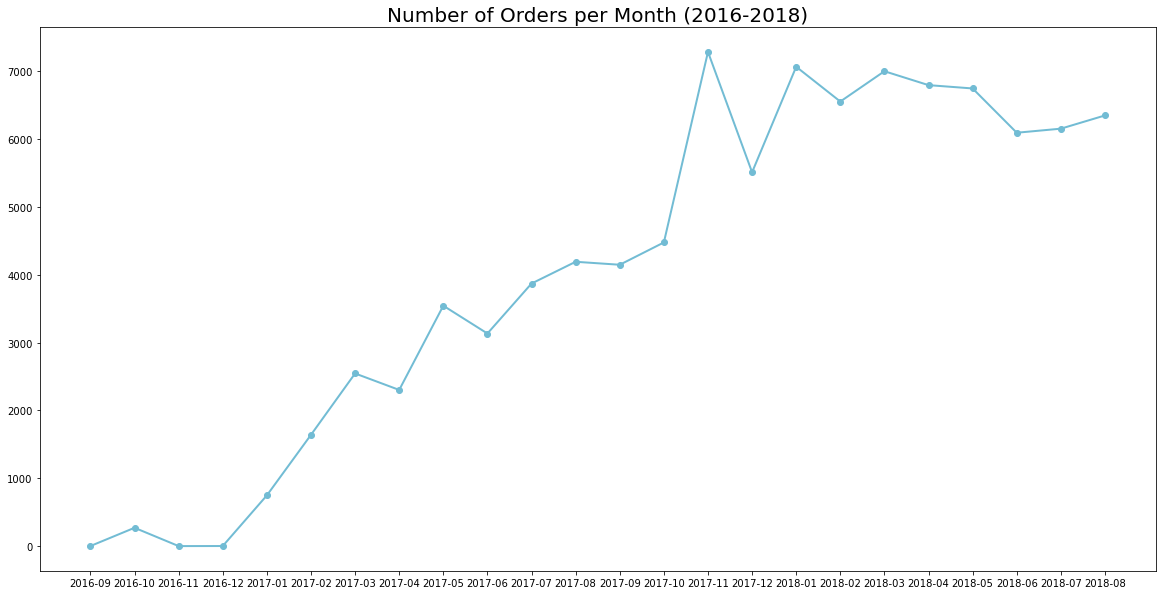

In [44]:
monthly_orders_df = all_df.resample(rule='M', on='order_purchase_timestamp').agg({
    "order_id": "nunique",
    "price": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m') #untuk mengubah format order date menjadi nama bulan
 
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "price": "revenue"
}, inplace=True)
 
plt.figure(figsize=(20, 10)) 
plt.plot(monthly_orders_df["order_purchase_timestamp"], monthly_orders_df["order_count"], marker='o', linewidth=2, color="#72BCD4") 
plt.title("Number of Orders per Month (2016-2018)", loc="center", fontsize=20) 
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.show()

#### Line chart pendapatan per bulan

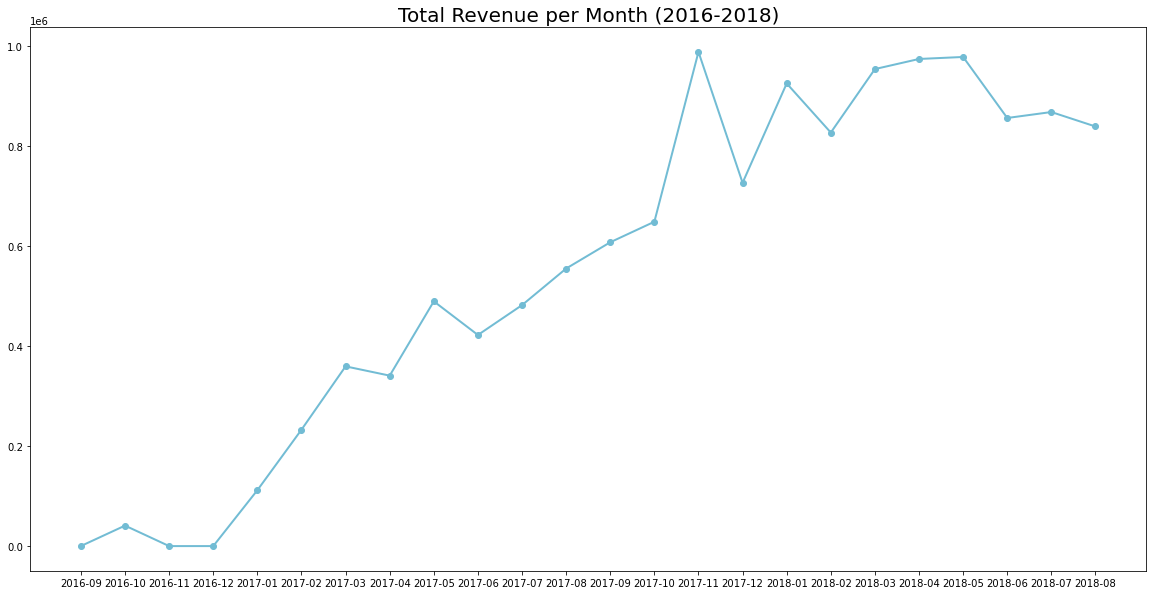

In [45]:
plt.figure(figsize=(20, 10))
plt.plot(
    monthly_orders_df["order_purchase_timestamp"],
    monthly_orders_df["revenue"],
    marker='o', 
    linewidth=2,
    color="#72BCD4"
)
plt.title("Total Revenue per Month (2016-2018)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Kedua kodingan di atas mengelompokkan data pesanan bulanan berdasarkan timestamp pembelian untuk menghitung jumlah pesanan unik dan total pendapatan, lalu mengubah format tanggal menjadi tahun-bulan. Selanjutnya, data yang sudah diolah tersebut divisualisasikan dalam bentuk grafik untuk menampilkan tren jumlah pesanan per bulan antara tahun 2016 hingga 2018. Berdasarkan visualisasi di atas, kita dapat melihat bahwa jumlah order dan pendapatan pada perusahaan terus meningkat per bulannya, dan jumlah order dan pendapatan terbanyak terjadi pada bulan November tahun 2017. 

### Pertanyaan 2: Kategori produk apa yang paling banyak dan paling sedikit terjual?

#### Menghitung total jumlah produk

In [46]:
sum_order_items_df = all_df.groupby("product_category_name").product_photos_qty.sum().sort_values(ascending=False).reset_index()
sum_order_items_df.head(15)

,product_category_name,product_photos_qty
0,moveis_decoracao,20820.0
1,esporte_lazer,18959.0
2,beleza_saude,17680.0
3,cama_mesa_banho,16639.0
4,utilidades_domesticas,16183.0
5,relogios_presentes,15019.0
6,informatica_acessorios,13594.0
7,telefonia,13193.0
8,brinquedos,11463.0
9,automotivo,10645.0


Kode di atas berfungsi untuk menghitung total jumlah produk untuk setiap kategori produk dalam dataframe all_df dengan menggunakan fungsi groupby, lalu mengurutkannya dari yang terbanyak ke yang terendah. Selanjutnya, hasilnya disimpan dalam variabel sum_order_items_df, dan hanya menampilkan 15 kategori teratas dengan menggunakan fungsi head().

#### Bar chart kategori produk yang paling banyak terjual dan sedikit terjual

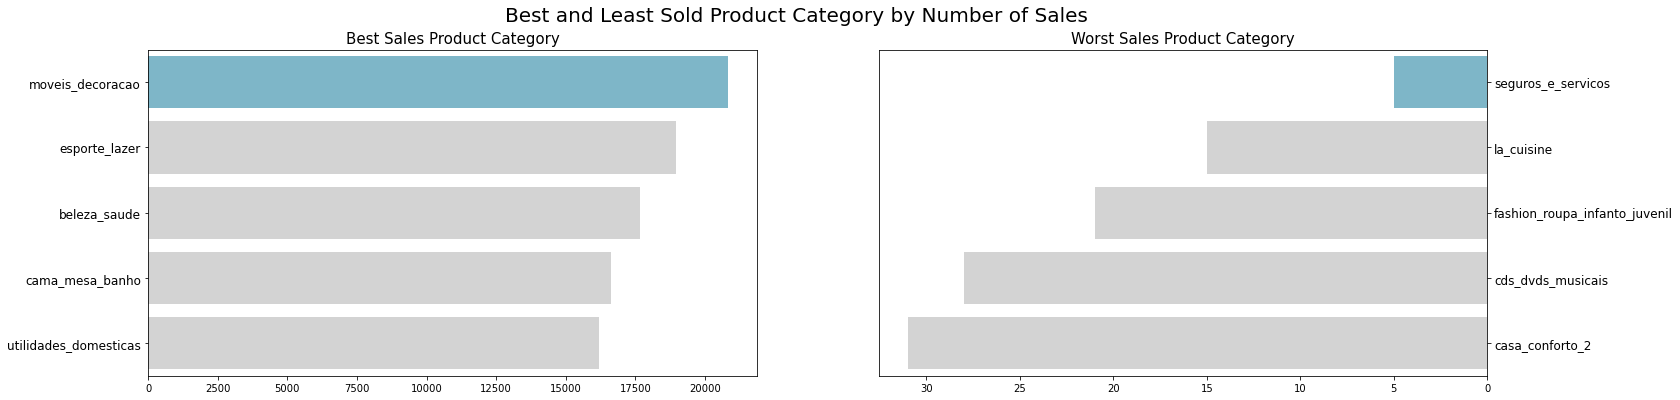

In [47]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
 
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
 
sns.barplot(x="product_photos_qty", y="product_category_name", data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Sales Product Category", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)
 
sns.barplot(x="product_photos_qty", y="product_category_name", data=sum_order_items_df.sort_values(by="product_photos_qty", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Sales Product Category", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)
 
plt.suptitle("Best and Least Sold Product Category by Number of Sales", fontsize=20)
plt.show()

Kode di atas berfungsi untuk membuat dua grafik batang berdampingan menggunakan matplotlib dan seaborn, yang menggambarkan kategori produk terbaik dan terburuk berdasarkan jumlah foto produk yang tersedia. Grafik di sebelah kiri menunjukkan kategori produk dengan penjualan yang paling banyak, sementara grafik di sebelah kanan menampilkan kategori dengan penjualan yang paling sedikit. Lima kategori produk dengan penjualan yang paling banyak adalah moveis_decoracao, esporte_lazer, beleza_saude, cama_mesa_banho, dan utilidades_domesticas. Sedangkan lima kategori produk dengan penjualan yang paling sedikit adalah seguros_e_services, la_cuisine, fashion_roupa_infanto_juvenil, cds_dvds_musicais, dan casa_comforto_2. 

### Pertanyaan 3: Bagaimana demografi pelanggan yang kita miliki berdasarkan state?

#### Bar chart demografi pelanggan berdasarkan state

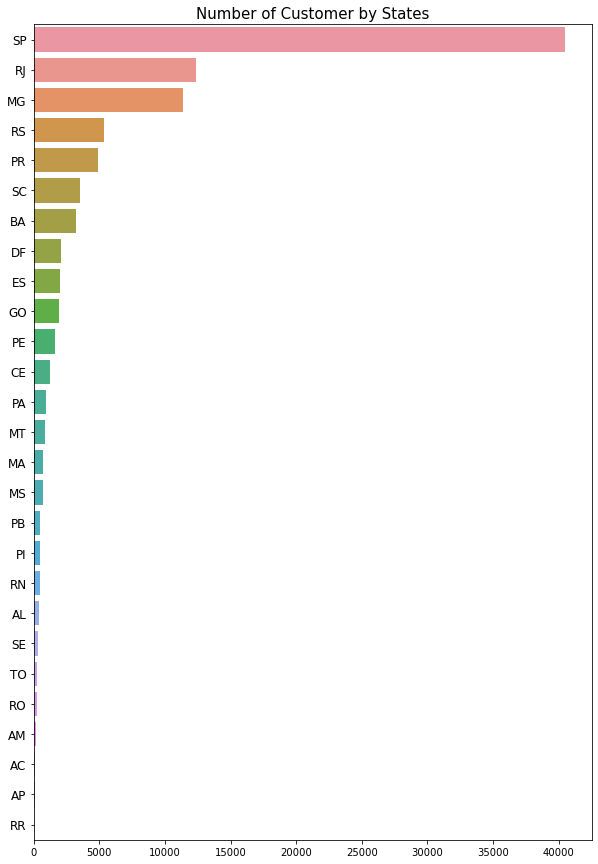

In [48]:
bystate_df = all_df.groupby(by="customer_state").customer_id.nunique().reset_index()
bystate_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
bystate_df
plt.figure(figsize=(10, 15))
sns.barplot(
    x="customer_count", 
    y="customer_state",
    data=bystate_df.sort_values(by="customer_count", ascending=False),
)
plt.title("Number of Customer by States", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

Kode di atas berfungsi untuk menghitung jumlah unik pelanggan dari setiap negara bagian dengan mengelompokkan data dalam all_df berdasarkan customer_state, lalu menyimpan hasilnya dalam dataframe bystate_df dan mengganti nama kolom untuk lebih jelas. Selanjutnya, bar chart dibuat untuk menunjukkan jumlah pelanggan per negara bagian dengan disusun dari yang terbanyak hingga terendah. Berdasarkan hasil visualisasi bar chart di atas, dapat dilihat bahwa negara bagian SP, RJ, dan MG memiliki banyak pelanggan yang melakukan transaksi.

**Insight:**
- Proses visualisasi data berperan untuk menjawab semua pertanyaan analisis atau bisnis yang telah dirumuskan sebelumnya, serta menyajikan visualisasi data yang memudahkan dalam menyampaikan hasil analisis tersebut.
- Untuk pertanyaan nomor 1 menggunakan line chart untuk menampilkan tren jumlah pesanan per bulan antara tahun 2016 hingga 2018. Selanjutnya, pertanyaan nomor 2 menggunakan dua grafik batang yang berdampingan, grafik di sebelah kiri menunjukkan kategori produk dengan penjualan paling banyak, sementara grafik di sebelah kanan menampilkan kategori dengan penjualan paling sedikit. Terakhir, pertanyaan nomor 3 menggunakan bar chart dibuat untuk menunjukkan jumlah pelanggan per negara bagian dengan disusun dari yang terbanyak hingga terendah.

## Analisis Lanjutan (Opsional)

### RFM Analysis
RFM Analysis dilakukan untuk mengelompokkan pelanggan ke dalam beberapa kategori berdasarkan tiga parameter, yaitu recency, frequency, dan monetary.
- Recency: parameter ini menunjukkan kapan terakhir kali seorang pelanggan melakukan transaksi.
- Frequency: parameter ini mengidentifikasi seberapa sering pelanggan melakukan transaksi.
- Monetary: parameter ini digunakan untuk mengetahui seberapa besar pendapatan yang dihasilkan dari pelanggan tersebut.

#### Membuat sebuah DataFrame untuk menyimpan informasi yang berkaitan dengan tiga parameter.

In [49]:
rfm_df = all_df.groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp": "max", # mengambil tanggal order terakhir
    "order_id": "nunique", # menghitung jumlah order
    "price": "sum" # menghitung jumlah revenue yang dihasilkan
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]
 
# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = orders_df["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
 
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,288
1,000161a058600d5901f007fab4c27140,1,54.90,409
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,547
3,0002414f95344307404f0ace7a26f1d5,1,149.90,378
4,000379cdec625522490c315e70c7a9fb,1,93.00,149


Kode di atas mengelompokkan data berdasarkan customer_id, menghitung total pesanan dan pendapatan yang dihasilkan oleh setiap pelanggan, serta menentukan tanggal pesanan terakhir. Setelah itu, kode menghitung seberapa lama sejak pelanggan terakhir kali melakukan transaksi dalam hitungan hari (recency) dan menghapus kolom tanggal pesanan terakhir.

#### Mencari best customer berdasarkan parameter frequency, monetary, dan recency

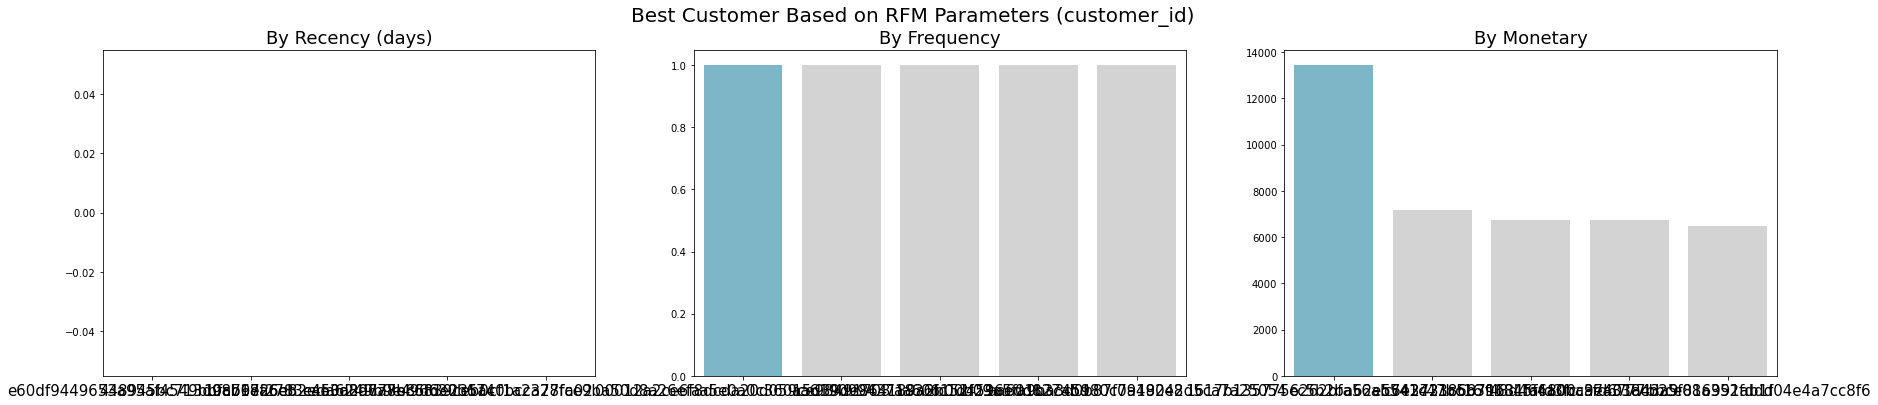

In [50]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))
 
sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)
 
sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)
 
sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)
 
plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

Kode di atas berfungsi untuk membuat tiga bar chart untuk menampilkan lima pelanggan terbaik berdasarkan recency, frequency, dan monetary, diurutkan secara masing-masing, dengan setiap grafik menunjukkan perbandingan pelanggan berdasarkan parameter tersebut.

### Clustering

Clustering ini bertujuan untuk mengelompokkan pelanggan berdasarkan jumlah transaksi.

#### Menghitung jumlah transaksi per customer

In [51]:
all_df['TotalTransactionAmount'] = all_df.groupby('customer_id')['price'].transform('sum')
all_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,TotalTransactionAmount
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,...,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,16.0,871766c5855e863f6eccc05f988b23cb,28013.0,campos dos goytacazes,RJ,58.90
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,...,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,19.0,eb28e67c4c0b83846050ddfb8a35d051,15775.0,santa fe do sul,SP,239.90
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,...,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,21.0,3818d81c6709e39d06b2738a8d3a2474,35661.0,para de minas,MG,199.00
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,...,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,12.0,af861d436cfc08b2c2ddefd0ba074622,12952.0,atibaia,SP,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,...,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,40.0,64b576fb70d441e8f1b2d7d446e483c5,13226.0,varzea paulista,SP,199.90


Kode di atas berfungsi untuk menghitung total transaksi untuk setiap pelanggan berdasarkan kolom price dan menyimpannya di kolom baru bernama TotalTransactionAmount. Dengan cara ini, setiap baris data akan memiliki nilai total seluruh transaksi sesuai customer_id.

#### Membuat kolom untuk cluster manual berdasarkan jumlah transaksi

In [52]:
def classify_spender(amount):
    if amount < 300:
        return 'Low spender'
    elif 300 <= amount <= 1500:
        return 'Medium spender'
    else:
        return 'High spender'

Kode di atas merupakan pembuatan function untuk mengklasifikasikan pelanggan berdasarkan jumlah pengeluaran transaksinya. Jika transaksi kurang dari 300, pelanggan dianggap sebagai 'Low spender', antara 300 hingga 1500 disebut 'Medium spender', dan lebih dari 1500 disebut 'High spender'.

#### Menerapkan fungsi manual_grouping ke setiap baris di kolom 'Jumlah_Transaksi'

In [53]:
all_df['SpenderCategory'] = all_df['TotalTransactionAmount'].apply(classify_spender)
all_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,TotalTransactionAmount,SpenderCategory
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,...,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,16.0,871766c5855e863f6eccc05f988b23cb,28013.0,campos dos goytacazes,RJ,58.90,Low spender
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,...,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,19.0,eb28e67c4c0b83846050ddfb8a35d051,15775.0,santa fe do sul,SP,239.90,Low spender
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,...,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,21.0,3818d81c6709e39d06b2738a8d3a2474,35661.0,para de minas,MG,199.00,Low spender
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,...,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,12.0,af861d436cfc08b2c2ddefd0ba074622,12952.0,atibaia,SP,12.99,Low spender
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,...,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,40.0,64b576fb70d441e8f1b2d7d446e483c5,13226.0,varzea paulista,SP,199.90,Low spender


Kode ini menggunakan function yang telah dibuat (classify_spender) untuk mengkategorikan pelanggan berdasarkan total transaksi mereka dan menyimpan hasilnya dalam kolom baru bernama SpenderCategory. Kategori ini kemudian ditambahkan ke setiap baris data dalam all_df berdasarkan nilai TotalTransactionAmount.

## Conclution

- Conclution pertanyaan 1 - Bagaimana kinerja penjualan serta pendapatan perusahaan dalam 2 tahun terakhir? Jumlah order dan pendapatan pada perusahaan terus meningkat per bulannya dan jumlah order dan pendapatan terbanyak terjadi pada bulan November tahun 2017 sehingga menunjukkan bahwa perusahaan tersebut memiliki kinerja penjualan yang baik.

- Conclution pertanyaan 2 - Kategori produk mana yang paling banyak dan paling sedikit terjual? Lima kategori produk dengan penjualan yang paling banyak adalah moveis_decoracao, esporte_lazer, beleza_saude, cama_mesa_banho, dan utilidades_domesticas. Sedangkan lima kategori produk dengan penjualan yang paling sedikit adalah seguros_e_services, la_cuisine, fashion_roupa_infanto_juvenil, cds_dvds_musicais, dan casa_comforto_2.

- Conclution pertanyaan 3 - Bagaimana profil demografi pelanggan kita berdasarkan negara bagian? Tiga negara bagian yang memiliki pelanggan terbanyak dalam melakukan transaksi adalah SP, RJ, dan MG, sedangkan tiga negara bagian yang memiliki pelanggan terendah dalam melakukan transaksi adalah AP, AC, dan RR.